PROBLEM DEFINITION
## Objective
. The model aims to predict the likelihood of burnout or mental health decline in healthcare workers based on their job satisfaction and stress levels.
. Classifying healthcare workers into different groups("low risk", "medium risk", "high risk") of experiencing mental health challenges based on their responses to job satisfaction and stress.
. Understanding the impact of job satisfaction and stress on mental health, helping to identify factors that contribute to poor mental health in healthcare workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:/Users/MUSAWENKOSI NYAWO/Downloads/New folder/Healthcare Workforce Mental Health Dataset.csv')
df

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
...,...,...,...,...,...,...,...,...,...,...
4995,HCP-04996,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,3,No,4,No
4996,HCP-04997,Registered Nurse,General Medicine,Work-Life Imbalance,7,Never,4,No,5,No
4997,HCP-04998,Critical Care Nurse,ICU,Safety Concerns,7,Occasionally,4,Yes,5,No
4998,HCP-04999,Healthcare Administrator,Administration,Career Stagnation,5,Occasionally,3,Yes,4,No


In [3]:
df.sample(5)

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
869,HCP-00870,Laboratory Technician,Laboratory,Poor Work Environment,7,Occasionally,3,No,8,No
784,HCP-00785,Registered Nurse,General Medicine,Heavy Workload,9,Often,2,Yes,10,Yes
3635,HCP-03636,Physician (Specialist),Specialty Care,Heavy Workload,9,Often,1,No,12,Yes
3029,HCP-03030,Medical Assistant,Outpatient Services,Work-Life Imbalance,7,Often,1,No,8,No
1808,HCP-01809,Registered Nurse,General Medicine,Heavy Workload,7,Often,1,Yes,6,Yes


In [4]:
df.describe()

,Stress Level,Job Satisfaction,Mental Health Absences
count,5000.000000,5000.000000,5000.000000
mean,7.327800,2.202200,7.396200
std,1.407673,1.045722,2.878625
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [6]:
df.isna().sum()

Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64

In [7]:
df.isnull()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


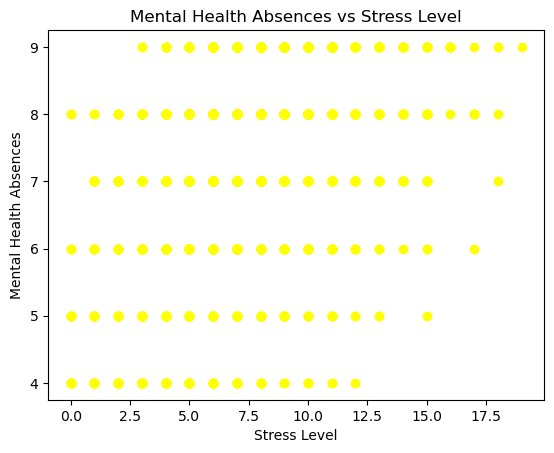

In [8]:
# Mental Health Absences based on Stress Leves
plt.scatter(df['Mental Health Absences'], df['Stress Level'], color='yellow')
plt.xlabel('Stress Level')
plt.ylabel('Mental Health Absences')
plt.title('Mental Health Absences vs Stress Level')
plt.show()

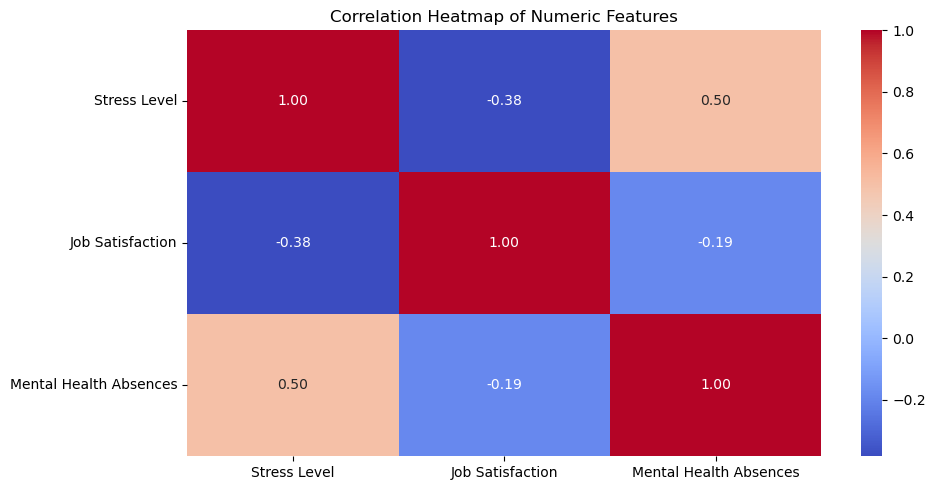

In [9]:
# Select only numeric columns for correlation
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Split Data into Train and Test Sets

In [10]:
x = np.random.rand(100,5)
y = np.random.randint(0,2,100)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                     test_size=0.2,
                                                       random_state=42)


In [11]:
df.value_counts()

Employee ID  Employee Type             Department           Workplace Factor       Stress Level  Burnout Frequency  Job Satisfaction  Access to EAPs  Mental Health Absences  Turnover Intention
HCP-00001    Pediatric Nurse           Pediatrics           Heavy Workload         8             Often              2                 Yes             6                       No                    1
HCP-03331    Medical Assistant         Outpatient Services  Heavy Workload         7             Often              1                 No              6                       No                    1
HCP-03338    Healthcare Administrator  Administration       Career Stagnation      4             Never              4                 Yes             4                       Yes                   1
HCP-03337    Radiology Technician      Radiology            Heavy Workload         9             Often              1                 Yes             8                       Yes                   1
HCP-03336    Nu

In [12]:
x_train

array([[4.74998175e-01, 7.16041936e-01, 3.65692181e-01, 4.73348849e-02,
        2.55062253e-02],
       [8.61973173e-01, 7.00353216e-01, 2.63496890e-01, 1.53035703e-01,
        3.13390009e-01],
       [7.65101391e-01, 8.86464557e-01, 7.13000223e-01, 8.79873740e-01,
        2.51007043e-01],
       [9.63857412e-01, 7.44912987e-03, 7.03906052e-01, 8.97997961e-01,
        7.92879667e-01],
       [9.15316904e-01, 6.59236375e-01, 1.46245611e-01, 4.92060319e-01,
        6.72547262e-01],
       [8.10965233e-01, 6.90577196e-01, 7.49831640e-01, 8.55034565e-01,
        5.01689132e-01],
       [2.36724836e-01, 2.42194176e-01, 2.02701320e-01, 9.50481742e-01,
        5.21307983e-01],
       [3.07290352e-01, 7.29393543e-01, 4.34403758e-01, 8.61576199e-02,
        5.28381859e-01],
       [1.75428496e-01, 4.79218067e-01, 5.95973764e-01, 7.74304447e-01,
        6.35459081e-01],
       [3.11566554e-01, 8.76452760e-01, 8.49722906e-01, 9.37993065e-01,
        1.97291978e-01],
       [7.53245919e-01, 3.5342

In [13]:
y_train

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

## Model Fitting

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Support Vector Machine(SMV)
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
svm_model

SVC(kernel='linear')

In [16]:
# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train,y_train)
linear_regression_model

LinearRegression()

In [17]:
# Random Forest
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train,y_train)
random_forest_regressor

RandomForestRegressor()

In [18]:
model_score = {}
model_score[svm_model] = svm_model.score(x_test,y_test)
model_score[svm_model]

0.45

In [19]:
model_score = {}
model_score[linear_regression_model] = linear_regression_model.score(x_test,y_test)
model_score[linear_regression_model]

-0.29276294105512735

In [20]:
model_score = {}
model_score[random_forest_regressor] = random_forest_regressor.score(x_test,y_test)
model_score[random_forest_regressor]

-0.36564835164835174

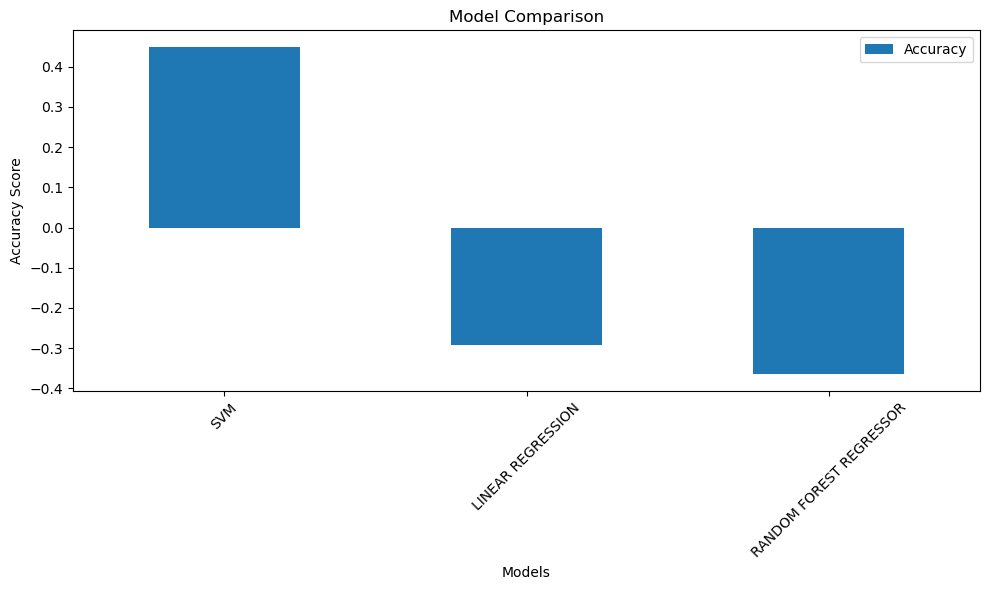

In [21]:
model_scores = {
    'SVM': svm_model.score(x_test, y_test),
    'LINEAR REGRESSION': linear_regression_model.score(x_test, y_test),
    'RANDOM FOREST REGRESSOR': random_forest_regressor.score(x_test, y_test)
}
model_compare = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
model_compare.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Predictions

In [22]:
# SVM PREDICTION
y_pred = svm_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [23]:
# LINEAR REGRESSION PREDICTION
y_pred_lr = linear_regression_model.predict(x_test)
y_pred_lr


array([0.32229688, 0.37519295, 0.49585994, 0.478945  , 0.53637616,
       0.49701812, 0.49122714, 0.37422242, 0.67094432, 0.30819796,
       0.60587121, 0.52863962, 0.35643083, 0.69776333, 0.50609874,
       0.56577365, 0.62911184, 0.50939649, 0.22404655, 0.53096753])

In [24]:
# RANDOM FOREST PREDICTION
y_pred_rf = random_forest_regressor.predict(x_test)
y_pred_rf

array([0.69, 0.6 , 0.4 , 0.4 , 0.54, 0.29, 0.43, 0.33, 0.76, 0.39, 0.48,
       0.72, 0.15, 0.6 , 0.53, 0.3 , 0.94, 0.31, 0.46, 0.43])

## Data Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler, Normalizer, Binarizer, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [26]:
# Standardization
scaler = StandardScaler()
scaler.fit(x_train)
standardized_x_train = scaler.transform(x_train)
standardized_x_test = scaler.transform(x_test)

In [27]:
# Normalization
scaler = Normalizer()
scaler.fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)


In [28]:
# Binarization
binarizer = Binarizer()
binarizer.fit(x)
binary_x = binarizer.transform(x)

In [29]:
# Encoding Categorical Features
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [30]:
# Generating Polynomial Features
poly = PolynomialFeatures()
poly.fit_transform(x)

array([[1.00000000e+00, 8.94540588e-04, 6.63614627e-01, ...,
        3.08352644e-01, 3.08646217e-01, 3.08940069e-01],
       [1.00000000e+00, 4.07056464e-01, 8.24142466e-01, ...,
        7.59076349e-01, 1.43293407e-02, 2.70499805e-04],
       [1.00000000e+00, 6.40832027e-01, 3.70302896e-01, ...,
        9.39827819e-01, 6.78031983e-01, 4.89161271e-01],
       ...,
       [1.00000000e+00, 8.42227613e-01, 6.77070138e-01, ...,
        1.96297133e-01, 2.65379139e-01, 3.58772879e-01],
       [1.00000000e+00, 7.13248279e-03, 3.61241483e-01, ...,
        3.48363668e-01, 1.08188102e-01, 3.35989841e-02],
       [1.00000000e+00, 7.12461575e-01, 4.00051914e-01, ...,
        3.92637244e-01, 5.36579987e-01, 7.33292848e-01]])

## Model Evaluation

In [31]:
# Classification Report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
svm_model.score(x_test, y_test)

0.45

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.58      0.54      0.56        13

    accuracy                           0.45        20
   macro avg       0.42      0.41      0.41        20
weighted avg       0.47      0.45      0.46        20



In [33]:
print(confusion_matrix(y_test,y_pred))

[[2 5]
 [6 7]]


In [34]:
mean_absolute_error(y_test, y_pred)

0.55

In [35]:
mean_squared_error(y_test, y_pred)

0.55

In [36]:
r2_score(y_test, y_pred)

-1.4175824175824183

In [37]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm_model,
                      x_train,
                      y_train,
                      cv=5))

[0.375  0.6875 0.4375 0.6875 0.5625]


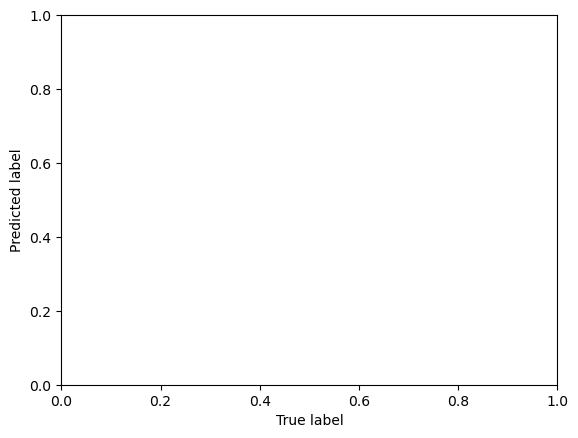

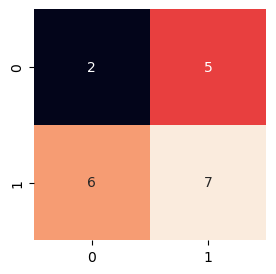

In [38]:
# sns.set(font_size=1.5)
def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plot_conf_mat(y_test, y_pred) 

## Model Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [40]:
svm_model = SVC(C=0.1, gamma='scale', kernel='linear')
svm_model.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [41]:
# Cross-val accuracy
cv_acc = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.45, 0.5 , 0.5 , 0.5 , 0.5 ])

In [42]:
np.mean(cv_acc)

np.float64(0.49000000000000005)

In [43]:
# Cross- Recall
cv_recall = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.909090909090909)

In [44]:
# F1 Score
cv_f1 = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.6376811594202898)

In [45]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
      dtype=int32)

In [46]:
x_test

array([[ 1.01721056,  1.74297941, -0.58729643, -0.67475094,  1.40196513],
       [-0.81707296, -0.44159819,  1.2032505 , -1.15794066,  1.53787648],
       [ 1.5294181 , -0.5353849 ,  1.51020475,  0.45425877, -0.8975516 ],
       [ 1.30746324,  0.5087188 , -0.43884756, -0.5062354 ,  0.63879526],
       [-1.55060167, -0.80942574,  0.38771798, -1.62723676, -0.03035877],
       [-1.54649095, -1.33582476,  1.39894319,  0.13730029, -0.73415229],
       [ 0.06468625, -0.71223859,  0.85705847, -1.76617202,  1.15032449],
       [-0.71699118, -0.6997822 ,  1.09983962,  1.14355976,  0.83204755],
       [ 1.45029071, -0.49848608, -0.72553589, -0.11083991, -0.97886594],
       [-1.56472184,  0.61862335,  0.68600067, -0.03374741,  0.15519788],
       [-0.70865052, -1.10486493, -0.58225116, -0.06231724,  0.14471621],
       [ 0.36258413, -0.80608525, -0.74230093,  1.23512234,  1.23097186],
       [-0.48823221,  0.16991999,  0.89083665, -1.03375125,  1.17791105],
       [ 0.08817852, -1.13664455, -0.4

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for random search
param_distributions = {
	'C': uniform(0.1, 100),
	'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
	'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10))
}

# Create RandomizedSearchCV object
randomized_search = RandomizedSearchCV(
	estimator=svm_model,
	param_distributions=param_distributions,
	n_iter=10,
	cv=5,
	random_state=42
)

# Fit the random search
randomized_search.fit(x_train, y_train)
print(randomized_search.best_score_)

0.6125


Text(0, 0.5, 'Score')

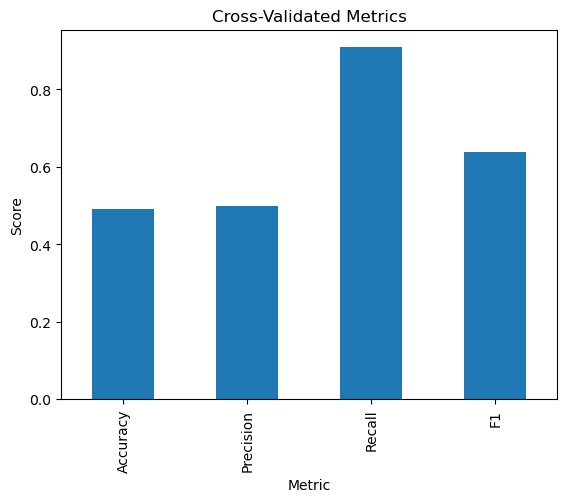

In [48]:
# Calculate precision using cross-validation
cv_precision = cross_val_score(svm_model,
                              x,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision)

# Visualize Cross-Validated Metrics
cv_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [np.mean(cv_acc), cv_precision, cv_recall, cv_f1]
})
cv_metrics.plot.bar(x='Metric', y='Score', legend=False, title='Cross-Validated Metrics')
plt.ylabel('Score')